#Neural Networks and Deep Learning


Source: https://github.com/amanchadha/coursera-deep-learning-specialization/tree/master/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Notes

#Introduction to deep learning


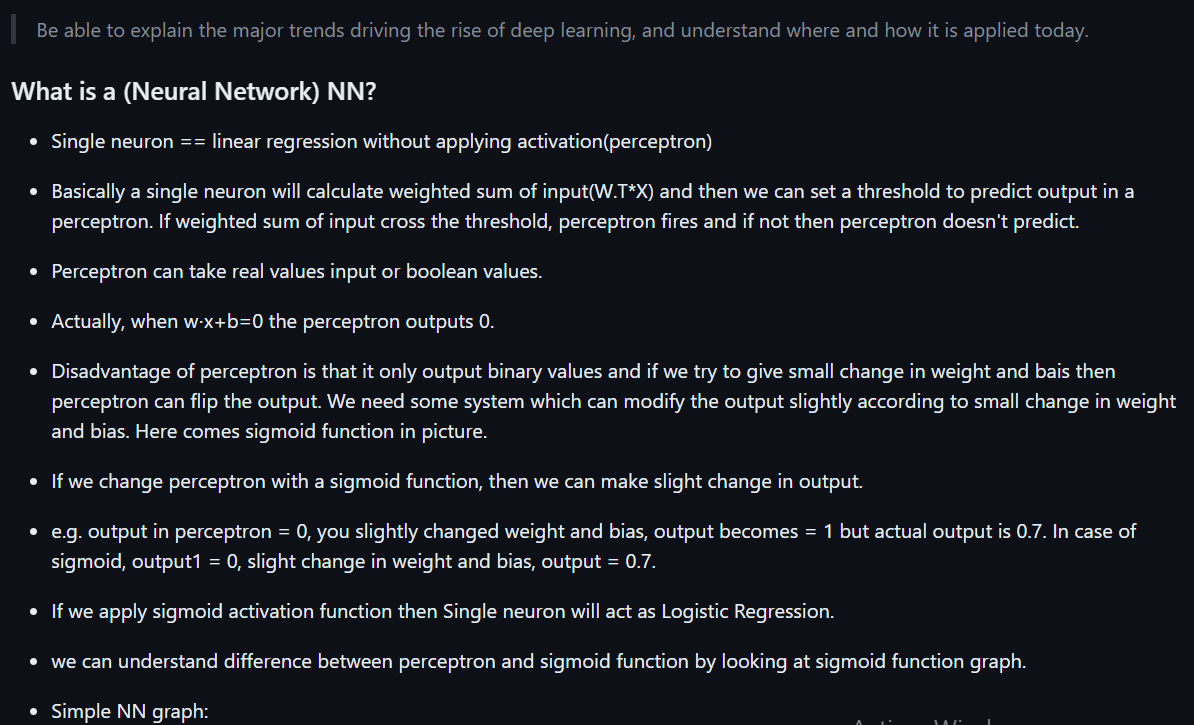

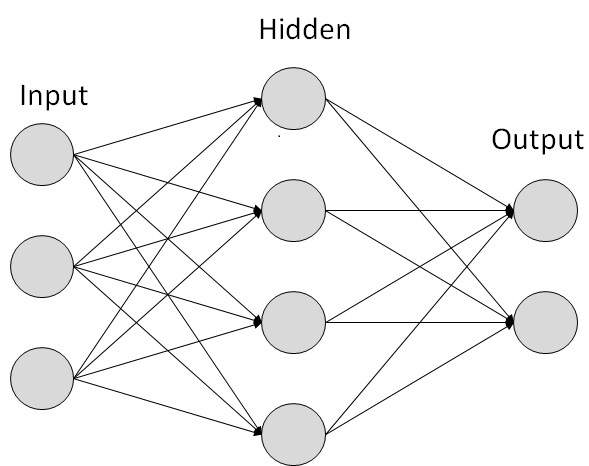

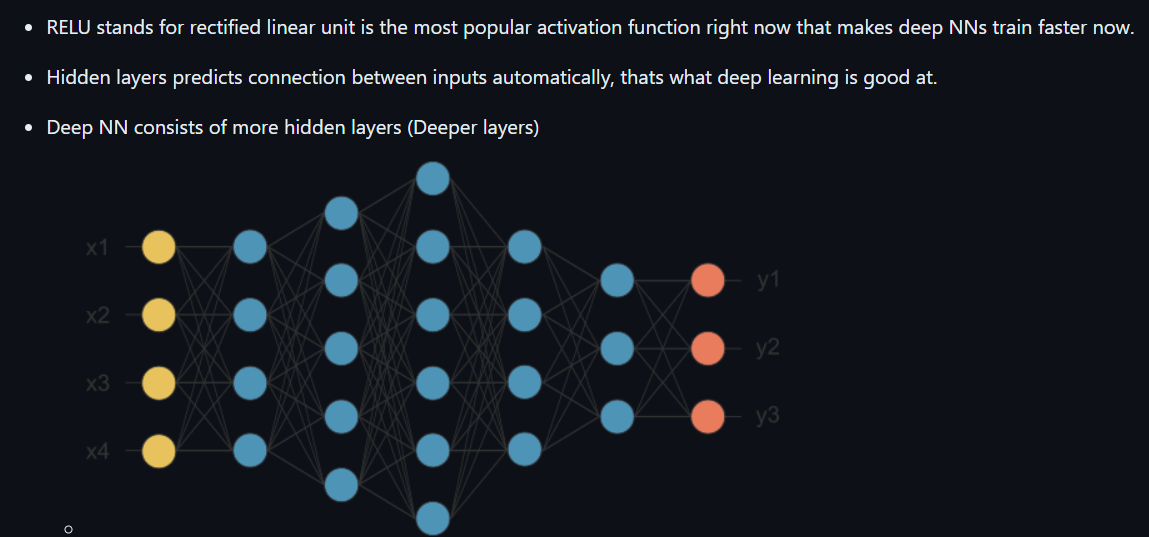

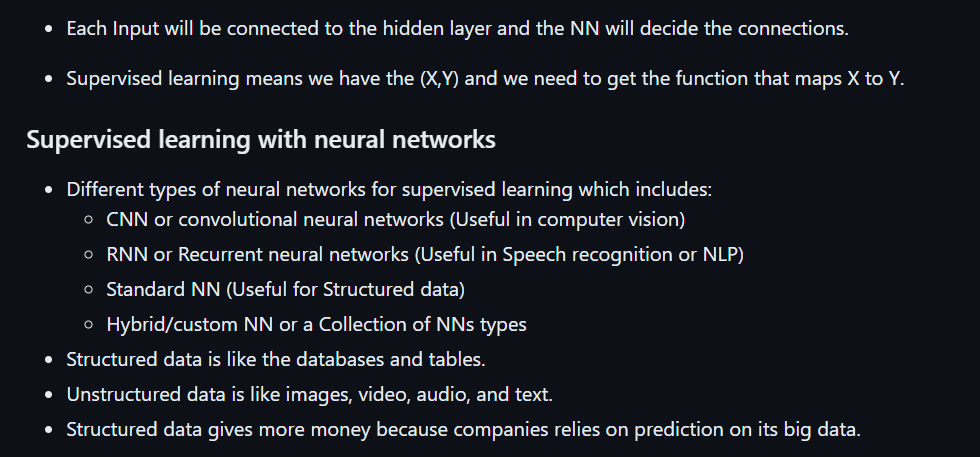

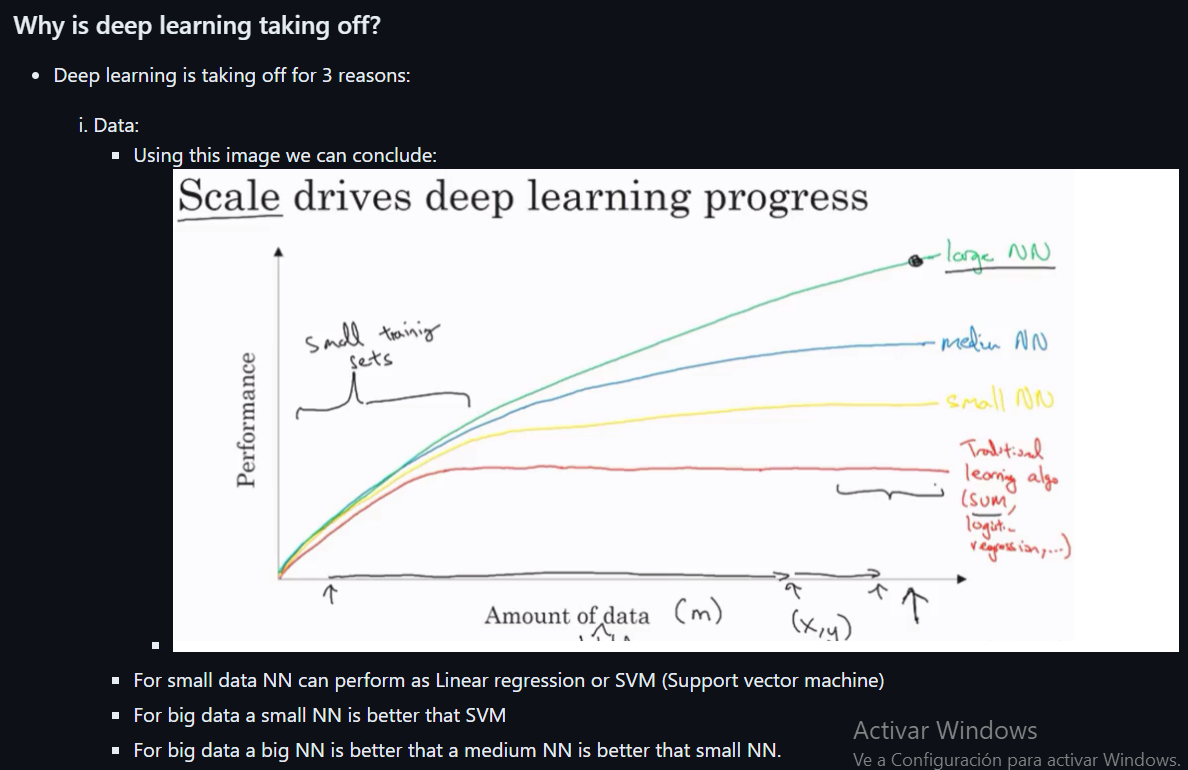

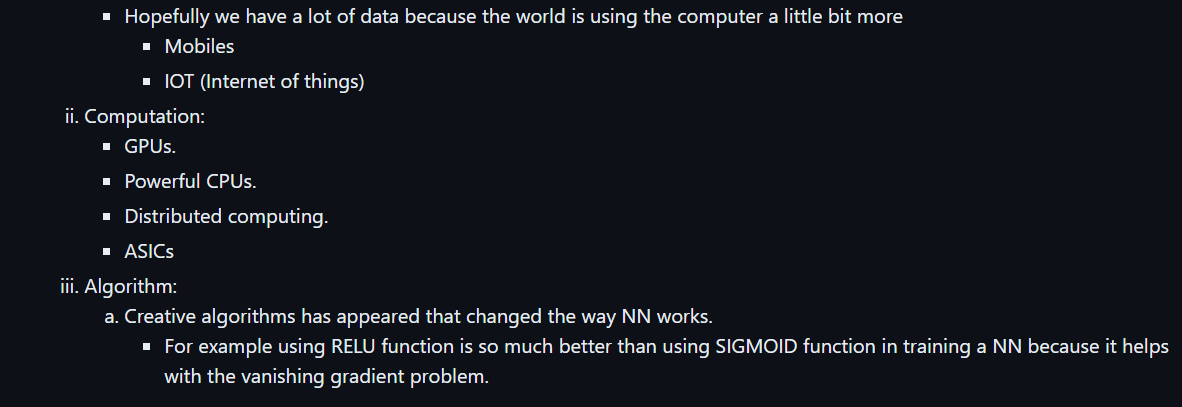

#Neural Networks Basics

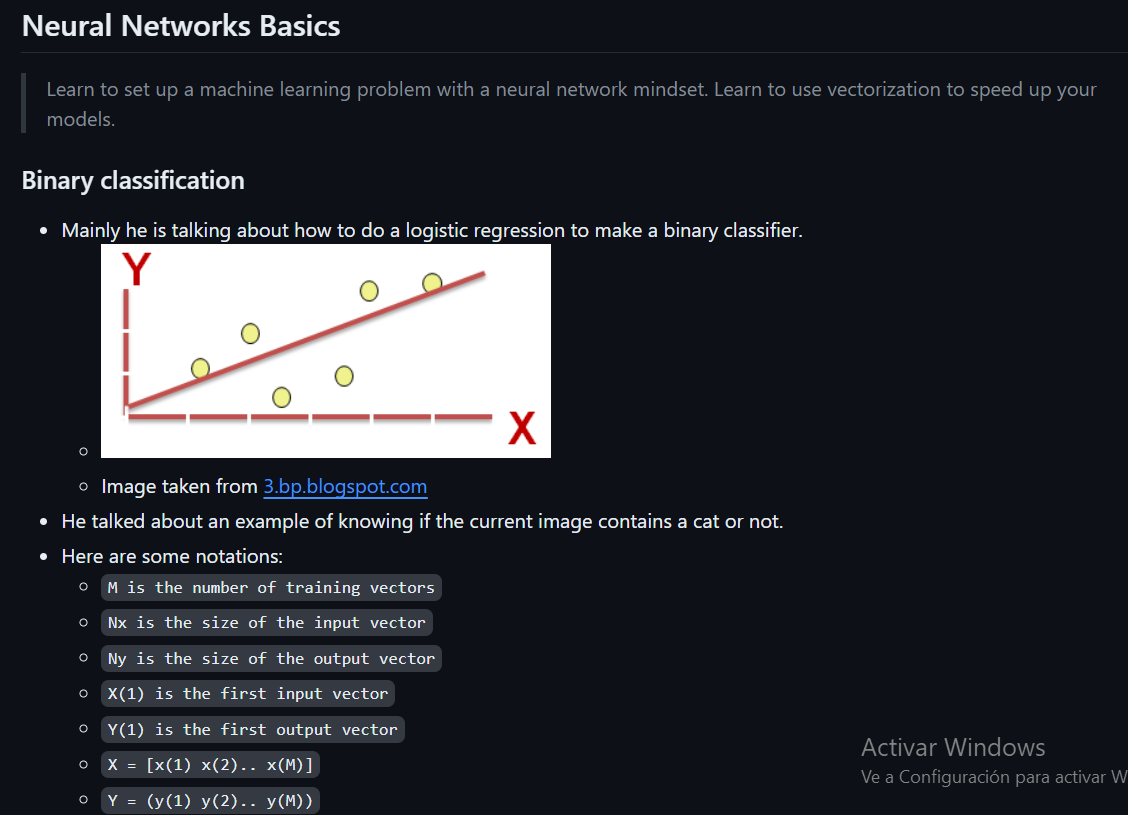

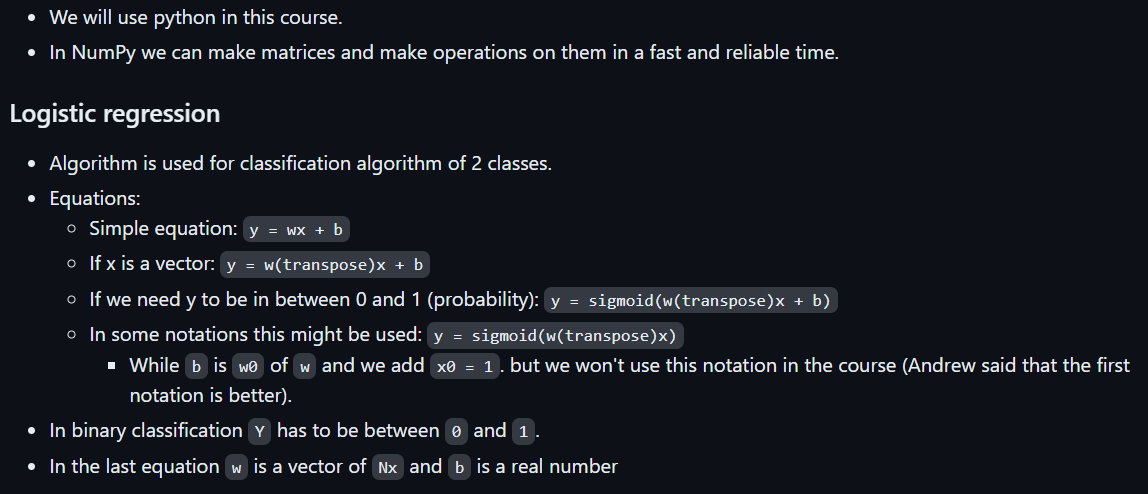

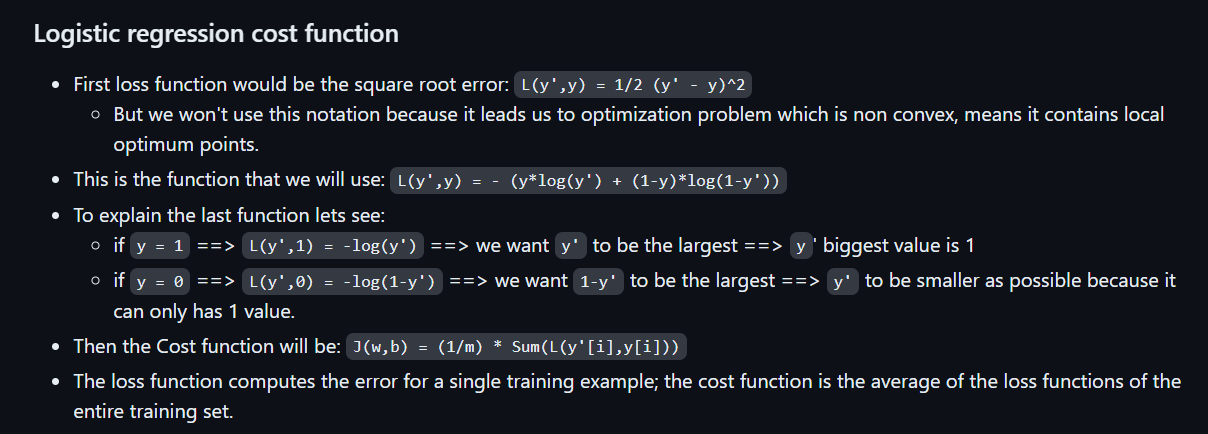

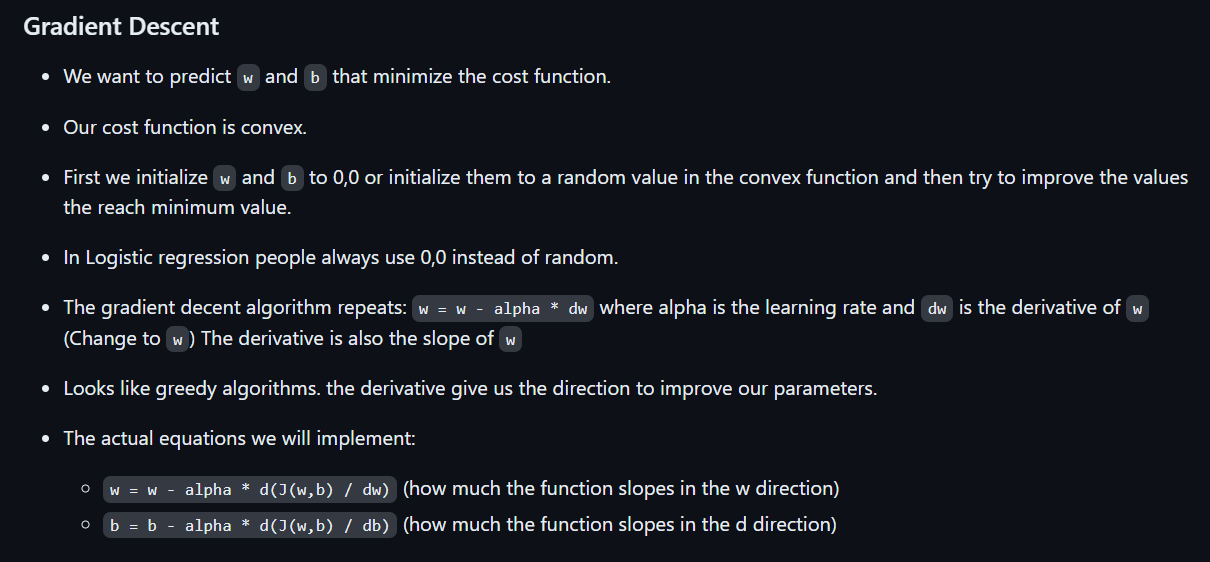

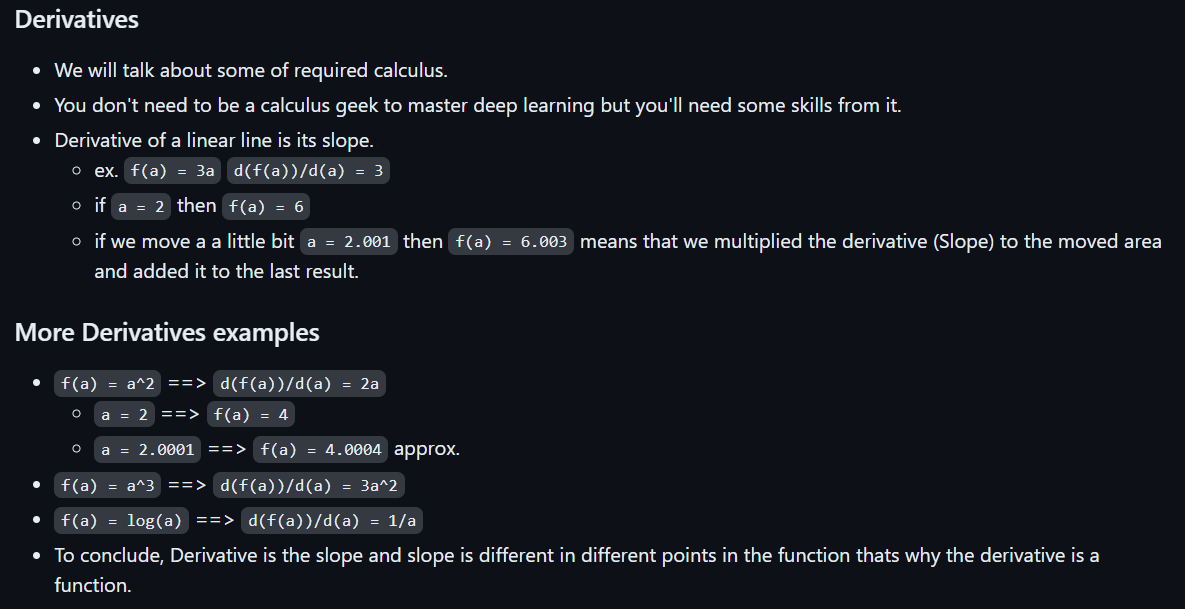

Epoch 1/20
13/13 [==============================] - 2s 29ms/step - loss: 0.6490 - accuracy: 0.5257 - val_loss: 0.5198 - val_accuracy: 0.7826
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.4318 - accuracy: 0.8533 - val_loss: 0.3621 - val_accuracy: 0.9348
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.3257 - accuracy: 0.9022 - val_loss: 0.2795 - val_accuracy: 0.9565
Epoch 4/20
13/13 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.9120 - val_loss: 0.2266 - val_accuracy: 0.9783
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.2247 - accuracy: 0.9267 - val_loss: 0.1926 - val_accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1963 - accuracy: 0.9413 - val_loss: 0.1698 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1743 - accuracy: 0.9413 - val_loss: 0.1536 - val_accuracy: 1.0000
Epoch 8/20
13/13 [=

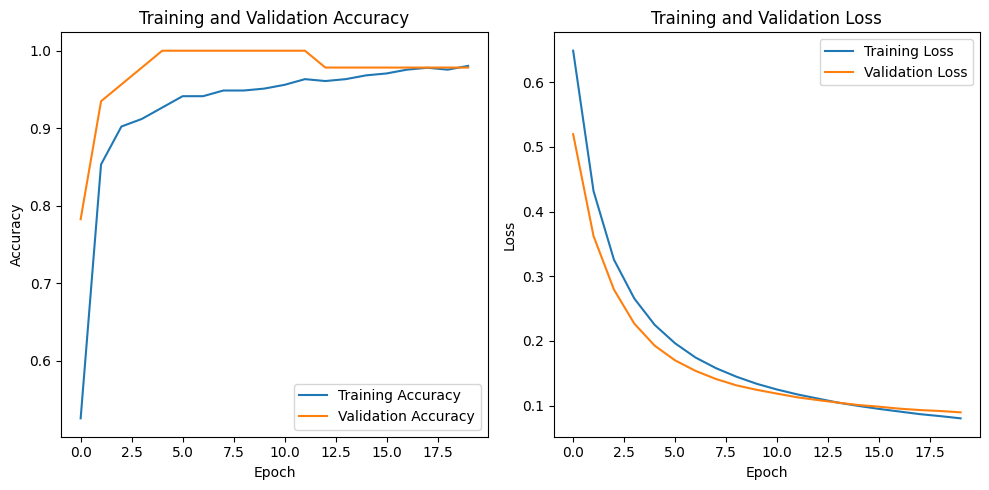

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()